# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
226409               2020-07-23           2020-07-21            2020-07-15   
226410               2020-07-23           2020-07-20            2020-07-22   
226411               2020-07-23           2020-07-23            2020-07-12   
226412               2020-07-23           2020-07-20            2020-07-17   
226413               2020-07-23           2020-07-20            2020-07-18   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
226409             2020-07-05 00:00:00                   NaT   
226410             2020-07-03 00:00:00                   NaT   
226411             2020-07-10 00:00:00                   NaT   
226412             2020-07-10 00:00:00                   NaT   
226413             2020-07-13 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación       Departamento  \
Id de caso                                                              
1                         NaT          Bogotá d.c.        Bogotá D.C.   
2                         NaT  Guadalajara de buga    Valle del Cauca   
3                         NaT             Medellín          Antioquia   
4                         NaT             Medellín          Antioquia   
5                         NaT             Medellín          Antioquia   
...                       ...                  ...                ...   
226409                    NaT         Barranquilla  Barranquilla D.E.   
226410                    NaT         Barranquilla  Barranquilla D.E.   
226411                    NaT              Soledad          Atlántico   
226412                    NaT             Guachené              Cauca   
226413                    NaT                 Cali    Valle del Cauca   

           Severidad      Estado  ... Clasificación de edad Sexo  \
Id de caso                        ...                              
1               Leve  Recuperado  ...               10 - 20    F   
2               Leve  Recuperado  ...               30 - 40    M   
3               Leve  Recuperado  ...               40 - 50    F   
4               Leve  Recuperado  ...               50 - 60    M   
5               Leve  Recuperado  ...               20 - 30    M   
...              ...         ...  ...                   ...  ...   
226409          Leve        Casa  ...               40 - 50    M   
226410          Leve        Casa  ...               50 - 60    F   
226411          Leve        Casa  ...               30 - 40    M   
226412      Moderado    Hospital  ...               70 - 80    M   
226413          Leve        Casa  ...               40 - 50    F   

           Pertenecia Étnica Nombre Grupo Étnico         Tipo  \
Id de caso                                                      
1                       Otro                 NaN    Importado   
2                       Otro                 NaN    Importado   
3                       Otro                 NaN    Importado   
4  

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1035   1435
Antioquia                                            8968  11645
Arauca                                                 37    137
Archipiélago de San Andrés Providencia y Santa ...     10     23
Atlántico                                            9342  10667
Barranquilla D.E.                                   12250  14336
Bogotá D.C.                                         36584  38015
Bolívar                                               860   1069
Boyacá                                                356    362
Buenaventura D.E.                                     725   1246
Caldas                                                277    274
Caquetá                                               243    242
Cartagena D.T. y C.                                  6247   7767
Casanare                                               81    118
Cauca                                                 602    791
Cesar                                                 993   1316
Chocó                                                1279   1482
Cundinamarca                                         3205   3308
Córdoba                                              1660   1684
Guainía                                                 6      8
Guaviare                                                8     44
Huila                                                 318    307
La Guajira                                            805    868
Magdalena                                             864    929
Meta                                                  528   1593
Nariño                                               2843   3449
Norte de Santander                                    525    729
Putumayo                                              207    253
Quindío                                               121    105
Risaralda                                             624    546
Santa Marta D.T. y C.                                1435   1543
Santander                                             889   1365
Sucre                                                2221   2630
Tolima                                                614   1312
Valle del Cauca                                      8288   9662
Vaupés                                                 27     34
Vichada                                                 1      1

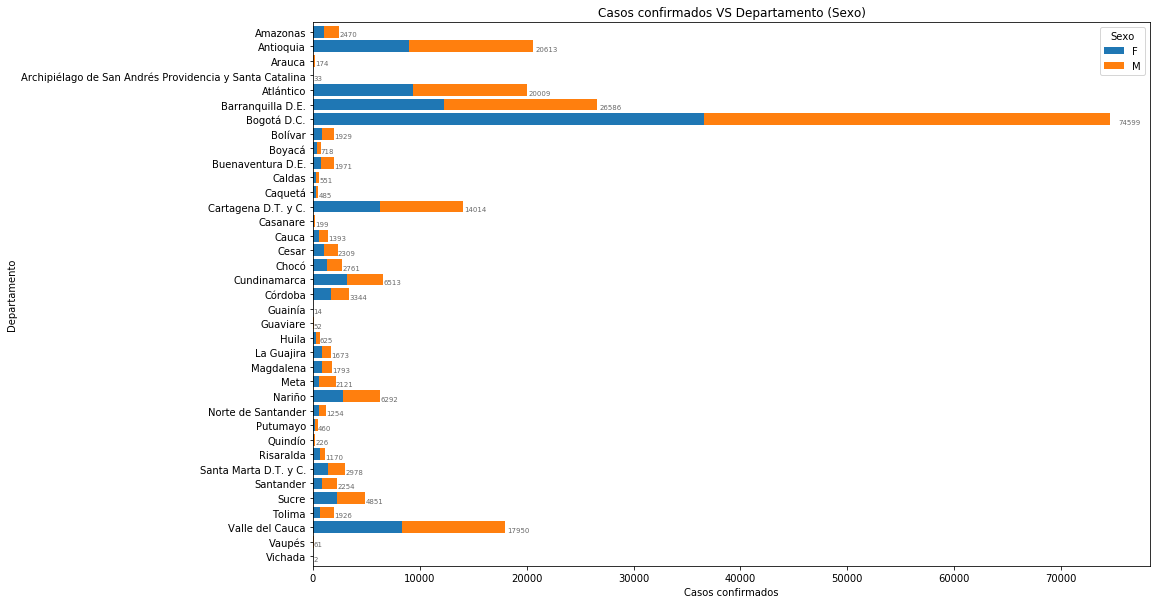

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               129      446      508   
Antioquia                                              746     1484     5541   
Arauca                                                   7       35       68   
Archipiélago de San Andrés Providencia y Santa ...       0        1        9   
Atlántico                                              861     1477     4383   
Barranquilla D.E.                                     1011     1662     5841   
Bogotá D.C.                                           3372     5786    17065   
Bolívar                                                 86      184      428   
Boyacá                                                  43       66      151   
Buenaventura D.E.                                       42      274      455   
Caldas                                                  18       37      127   
Caquetá                                                 13       30      150   
Cartagena D.T. y C.                                    582      994     3222   
Casanare                                                10        9       56   
Cauca                                                   66      126      327   
Cesar                                                  172      217      548   
Chocó                                                  119      235      636   
Cundinamarca                                           326      480     1487   
Córdoba                                                115      172      697   
Guainía                                                  0        2        4   
Guaviare                                                 0       19       10   
Huila                                                   38       62      122   
La Guajira                                              87      166      377   
Magdalena                                               96      133      320   
Meta                                                    33      143      681   
Nariño                                                 303      561     1484   
Norte de Santander                                      45       51      301   
Putumayo                                                10       32      122   
Quindío                                                  8       14       37   
Risaralda                                               80      106      261   
Santa Marta D.T. y C.                                  123      205      656   
Santander                                               85      197      562   
Sucre                                                  203      357     1016   
Tolima                                                  75      114      629   
Valle del Cauca                                        627     1256     4090   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                476      332      270   
Antioquia                                              5213     3190     2370   
Arauca                                                   42       12        6   
Archipiélago de San Andrés Providencia y Santa ...       11        7        3   
Atlántico                                              4702     3163     2601   
Barranquilla D.E.                                      6319     4156     3578   
Bogotá D.C.                                           16261    11976    10118   
Bolívar                                                 456      276      172   
Boyacá                                                  133      112 

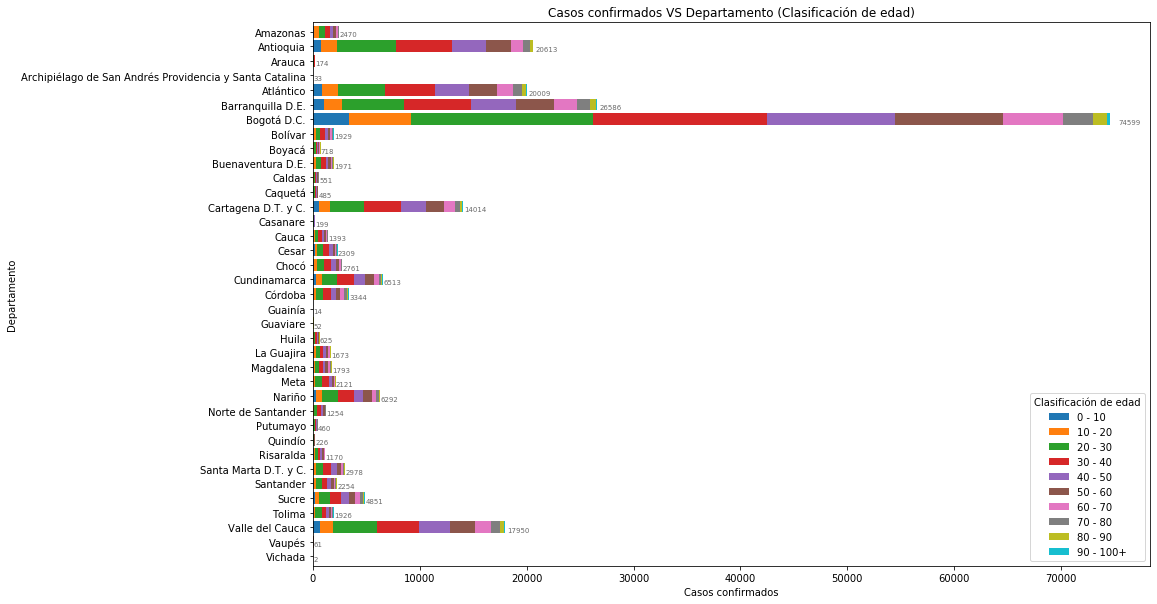

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               64.0      101.0   
Antioquia                                           13811.0      275.0   
Arauca                                                 61.0        1.0   
Archipiélago de San Andrés Providencia y Santa ...      8.0        0.0   
Atlántico                                            5960.0      936.0   
Barranquilla D.E.                                    7514.0     1359.0   
Bogotá D.C.                                         38588.0     1905.0   
Bolívar                                               643.0       87.0   
Boyacá                                                264.0       23.0   
Buenaventura D.E.                                     309.0      129.0   
Caldas                                                254.0        7.0   
Caquetá                                               372.0        8.0   
Cartagena D.T. y C.                                  3602.0      433.0   
Casanare                                               90.0        3.0   
Cauca                                                 703.0       40.0   
Cesar                                                 854.0       44.0   
Chocó                                                 778.0       83.0   
Cundinamarca                                         2770.0      156.0   
Córdoba                                              1648.0      381.0   
Guainía                                                 0.0        1.0   
Guaviare                                                7.0        0.0   
Huila                                                 220.0       18.0   
La Guajira                                            853.0       95.0   
Magdalena                                             571.0      171.0   
Meta                                                  632.0       26.0   
Nariño                                               2253.0      186.0   
Norte de Santander                                    757.0       51.0   
Putumayo                                              336.0       19.0   
Quindío                                                43.0        6.0   
Risaralda                                             523.0       24.0   
Santa Marta D.T. y C.                                1358.0      122.0   
Santander                                            1188.0       58.0   
Sucre                                                2330.0      276.0   
Tolima                                                682.0       37.0   
Valle del Cauca                                      6841.0      626.0   
Vaupés                                                 31.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                12.0           6.0   
Antioquia                                              888.0         143.0   
Arauca                                                   6.0           2.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              720.0         102.0   
Barranquilla D.E.                                      976.0         122.0   
Bogotá D.C.                                           4314.0         343.0   
Bolívar                                                108.0           7.0   
Boyacá                                                  50.0           5.0   
Buenaventura D.E.                                      117.0          26.0   
Caldas                                                  25.0           7.0   
Caquetá                                                 46.0           4.0   
Cartagena D.T. y C.  

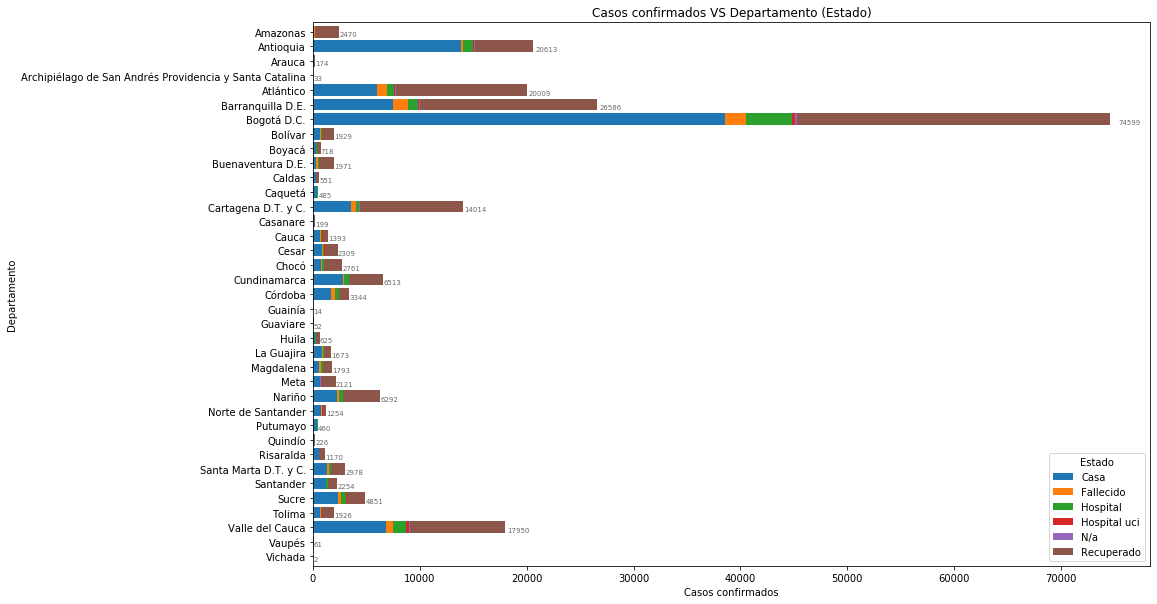

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          45964  50954
Fallecido      2826   4862
Hospital       5077   6793
Hospital uci    522    971
N/a             193    260
Recuperado    50496  57455

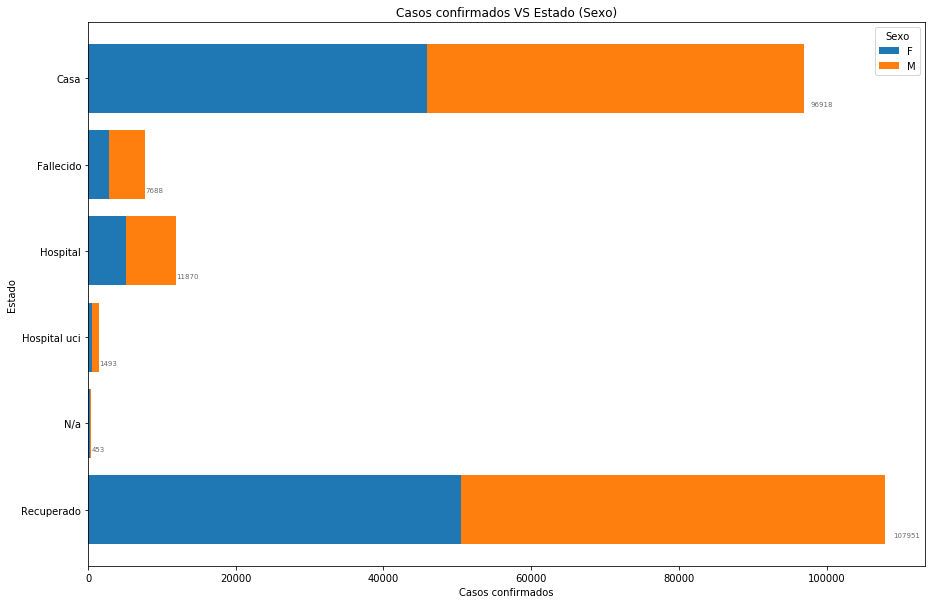

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3947     7405    24435    24111    15688    11917   
Fallecido                  14       17      108      271      625     1191   
Hospital                  448      265      977     1529     1854     2470   
Hospital uci               56       24       52      160      213      367   
N/a                        11        9       20       19       35       53   
Recuperado               5059     9419    26798    26002    16970    12855   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      5781     2439     1016        179  
Fallecido                 1814     1903     1412        333  
Hospital                  2147     1380      702         98  
Hospital uci               334      212       70          5  
N/a                         91       99       90         26  
Recuperado                6587     2949     1130        182

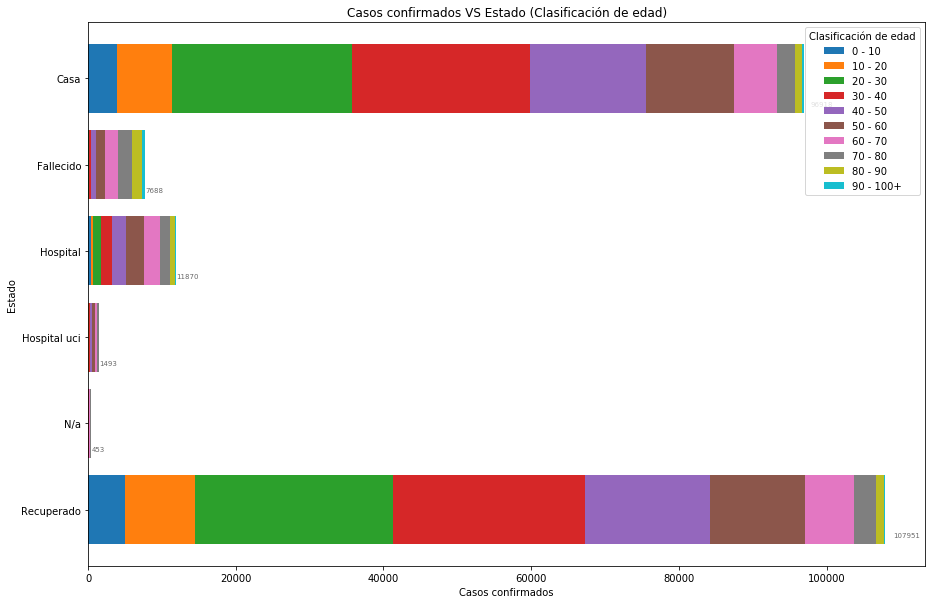

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F       M
Tipo                      
En estudio   98974  108039
Importado      453     516
Relacionado   5651   12740

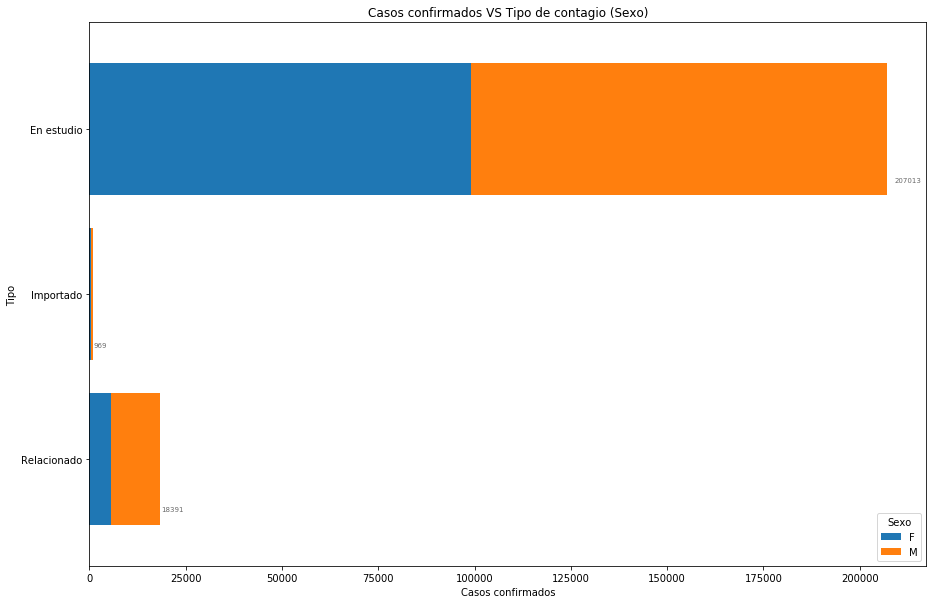

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               8689    14739    47046    47483    32859    26977   
Importado                   6       36      239      228      172      149   
Relacionado               840     2364     5105     4381     2354     1727   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               15777     8509     4172        762  
Importado                   94       35        9          1  
Relacionado                883      438      239         60

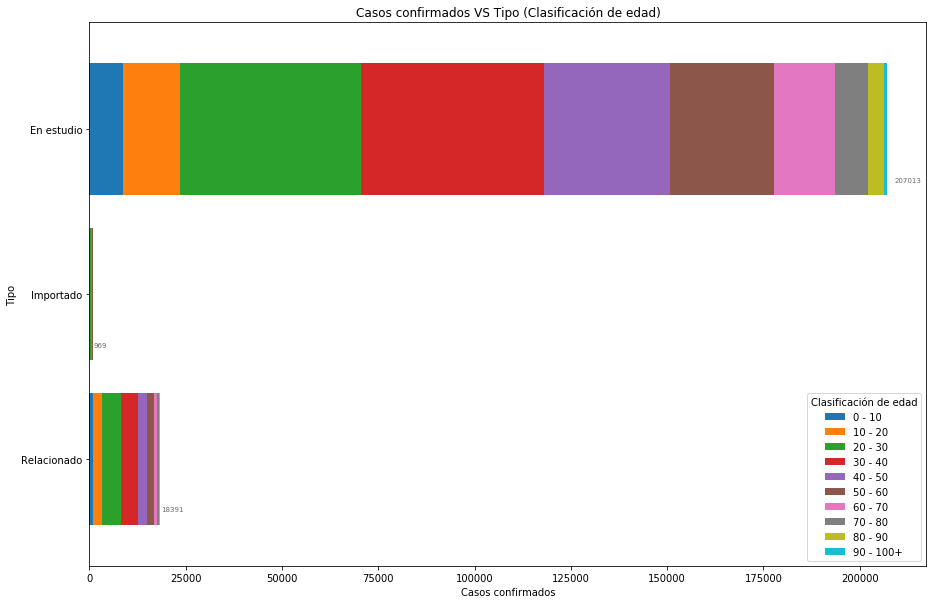

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  4751   4784
10 - 20                 7898   9241
20 - 30                24687  27703
30 - 40                23672  28420
40 - 50                16463  18922
50 - 60                13242  15611
60 - 70                 7675   9079
70 - 80                 4042   4940
80 - 90                 2166   2254
90 - 100+                482    341

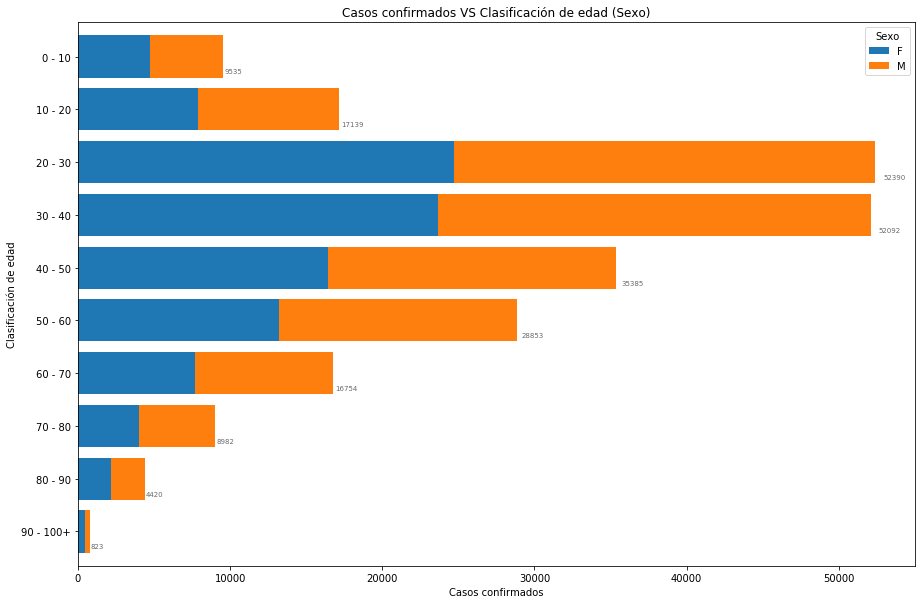

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3947         14       448            56   11   
10 - 20                 7405         17       265            24    9   
20 - 30                24435        108       977            52   20   
30 - 40                24111        271      1529           160   19   
40 - 50                15688        625      1854           213   35   
50 - 60                11917       1191      2470           367   53   
60 - 70                 5781       1814      2147           334   91   
70 - 80                 2439       1903      1380           212   99   
80 - 90                 1016       1412       702            70   90   
90 - 100+                179        333        98             5   26   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       5059  
10 - 20                      9419  
20 - 30                     26798  
30 - 40                     26002  
40 - 50                     16970  
50 - 60                     12855  
60 - 70                      6587  
70 - 80                      2949  
80 - 90                      1130  
90 - 100+                     182

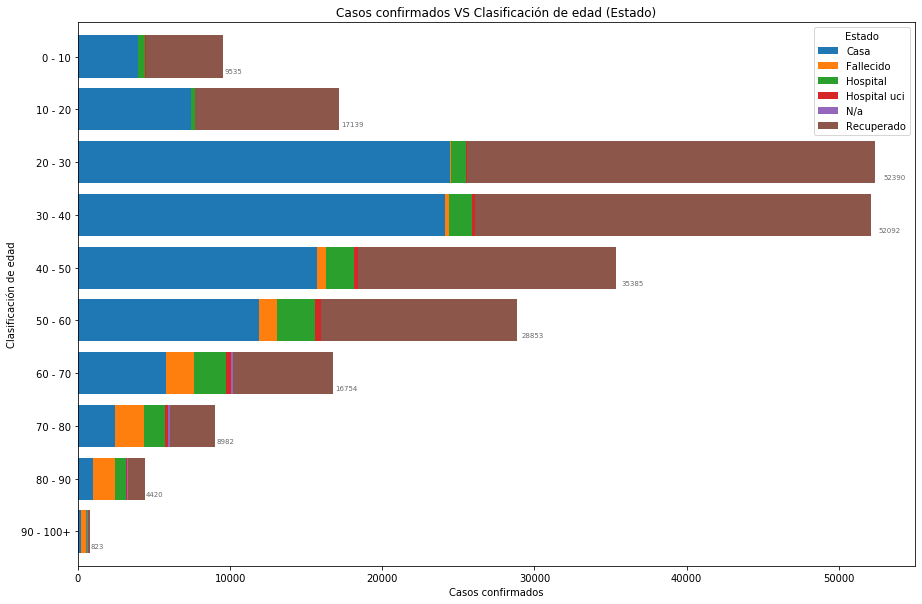

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-19            3663.0  4002.0
2020-07-20            2558.0  2962.0
2020-07-21            3579.0  4120.0
2020-07-22            3388.0  4105.0
2020-07-23              72.0    83.0

[137 rows x 2 columns]

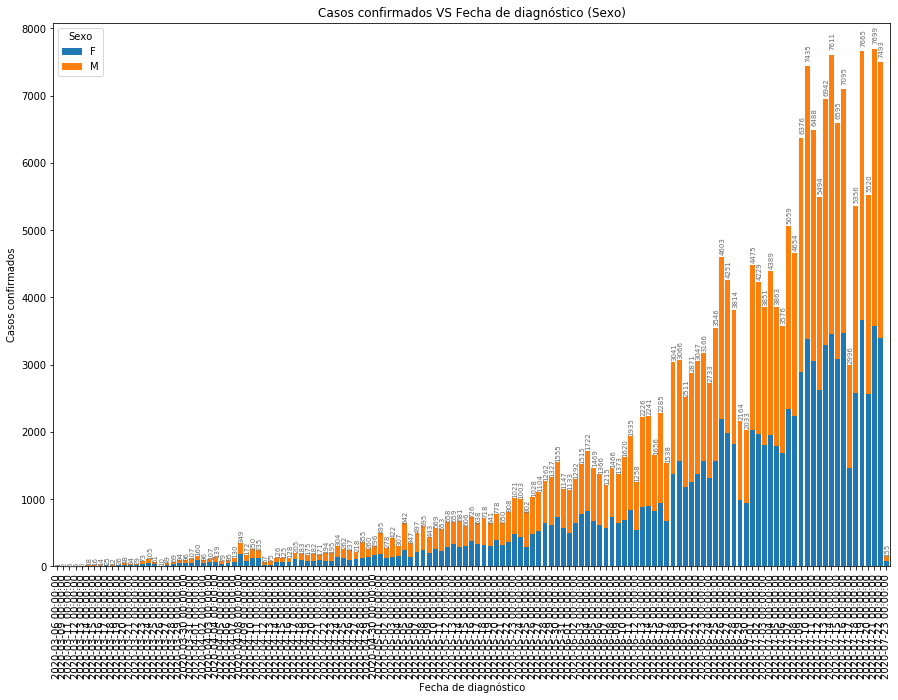

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-19                308      641     1783     1801     1266      944   
2020-07-20                235      384     1173     1253      900      742   
2020-07-21                285      499     1866     1796     1266      969   
2020-07-22                251      475     1747     1729     1159     1045   
2020-07-23                  7       17       29       27       21       25   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-19                 517      251      126         28  
2020-07-20                 463      236      107         27  
2020-07-21                 537      281      171         29  
2020-07-22                 606      305      148         28  
2020-07-23                  17        4        6          2  

[137 rows x 10 columns]

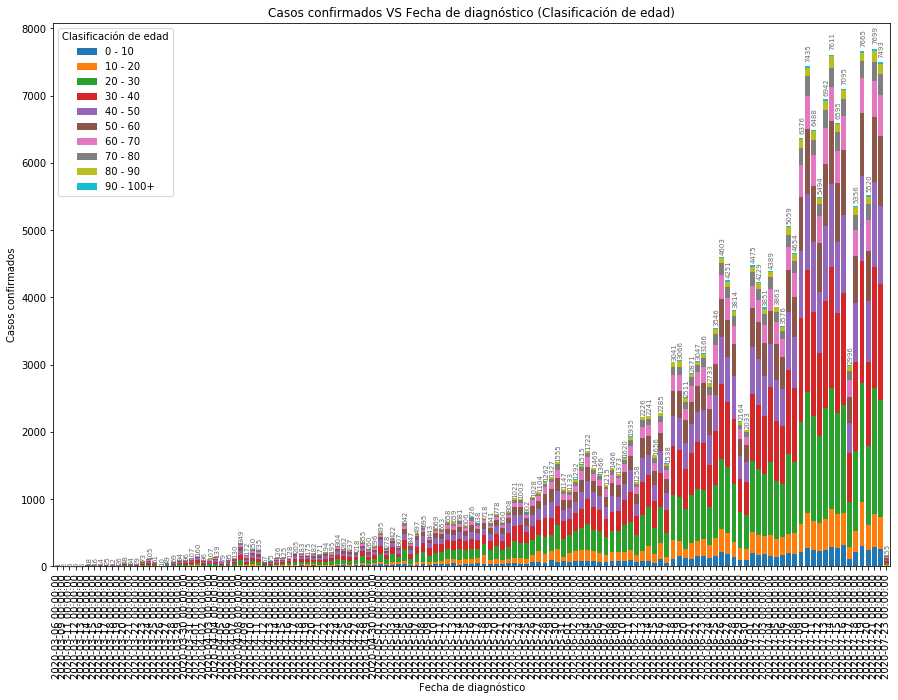

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-19            7042.0      148.0     414.0          22.0  7.0   
2020-07-20            4897.0       93.0     502.0          21.0  3.0   
2020-07-21            7115.0      113.0     422.0          46.0  2.0   
2020-07-22            6765.0       54.0     605.0          67.0  2.0   
2020-07-23             144.0        0.0       8.0           3.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-19                  32.0  
2020-07-20                   4.0  
2020-07-21                   1.0  
2020-07-22                   0.0  
2020-07-23                   0.0  

[137 rows x 6 columns]

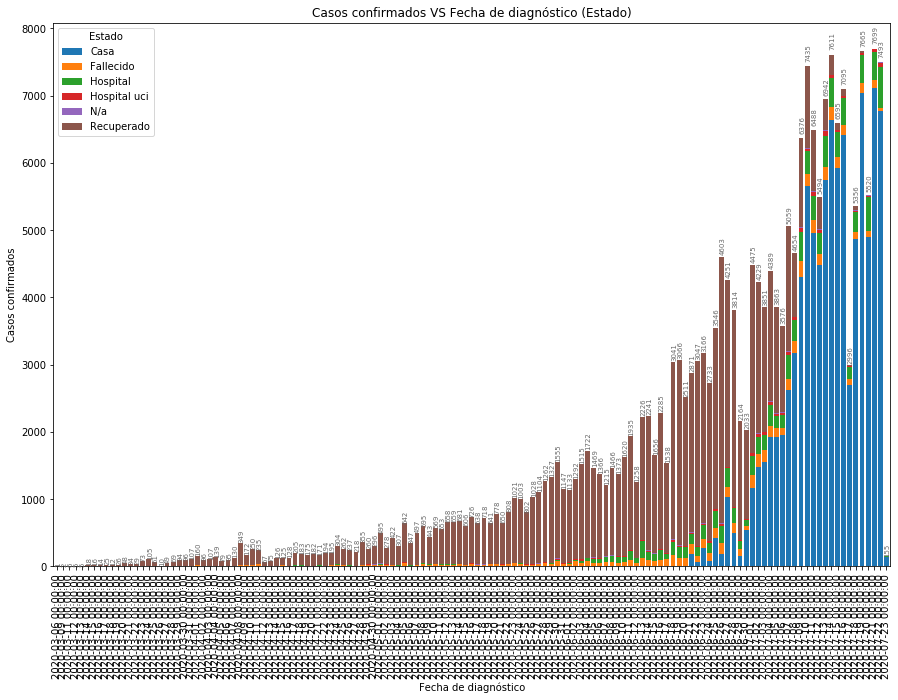

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-19             93705.0  108035.0
2020-07-20             96263.0  110997.0
2020-07-21             99842.0  115117.0
2020-07-22            103230.0  119222.0
2020-07-23            103302.0  119305.0

[137 rows x 2 columns]

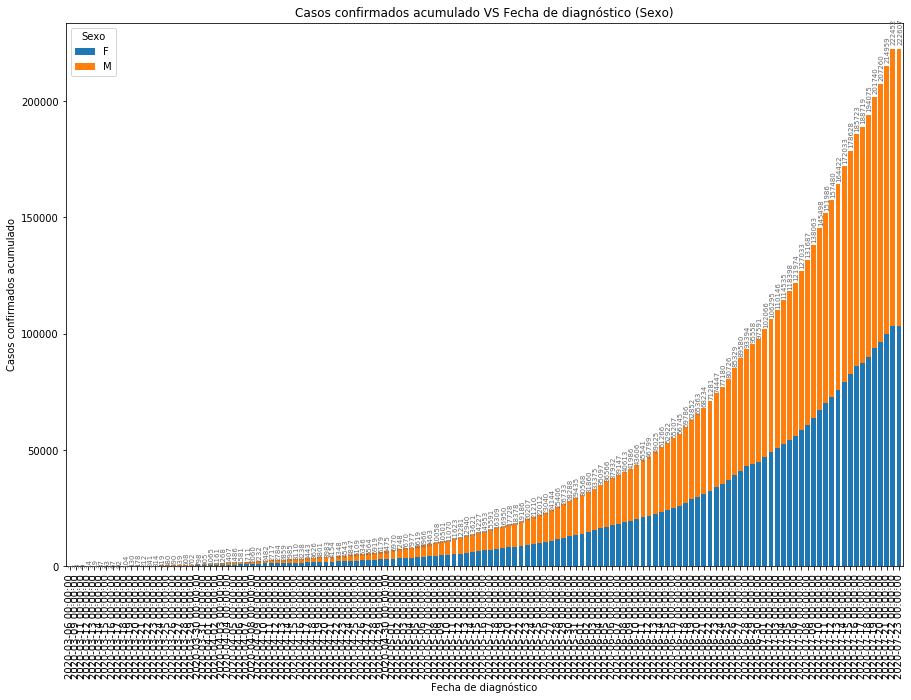

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-19               8626    15489    46677    46381    31486    25611   
2020-07-20               8861    15873    47850    47634    32386    26353   
2020-07-21               9146    16372    49716    49430    33652    27322   
2020-07-22               9397    16847    51463    51159    34811    28367   
2020-07-23               9404    16864    51492    51186    34832    28392   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-19               14841     7998     3904        727  
2020-07-20               15304     8234     4011        754  
2020-07-21               15841     8515     4182        783  
2020-07-22               16447     8820     4330        811  
2020-07-23               16464     8824     4336        813  

[137 rows x 10 columns]

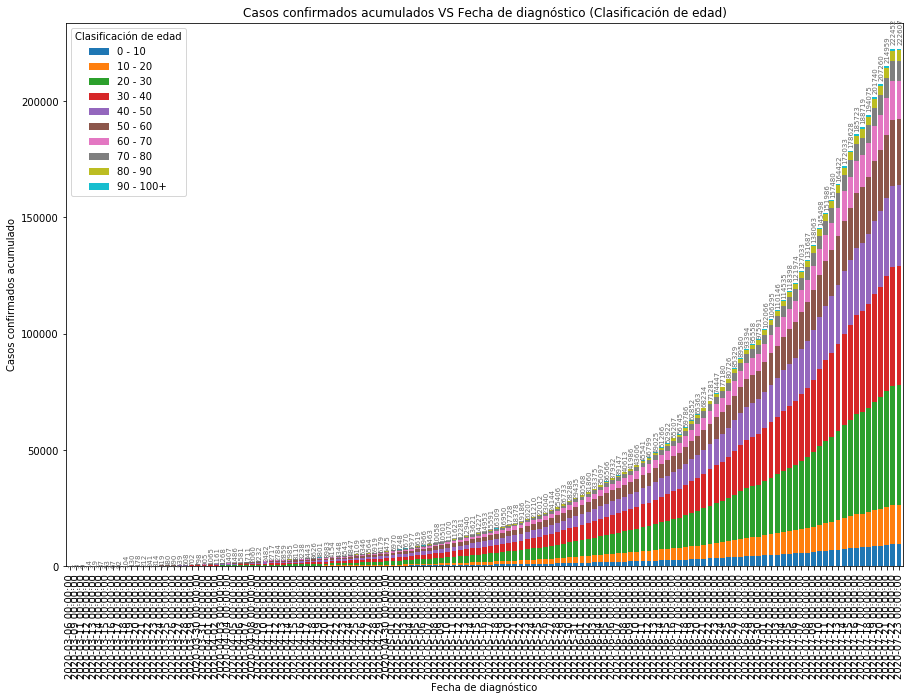

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-19            77948.0     7258.0   10179.0        1322.0  427.0   
2020-07-20            82845.0     7351.0   10681.0        1343.0  430.0   
2020-07-21            89960.0     7464.0   11103.0        1389.0  432.0   
2020-07-22            96725.0     7518.0   11708.0        1456.0  434.0   
2020-07-23            96869.0     7518.0   11716.0        1459.0  434.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-19              104606.0  
2020-07-20              104610.0  
2020-07-21              104611.0  
2020-07-22              104611.0  
2020-07-23              104611.0  

[137 rows x 6 columns]

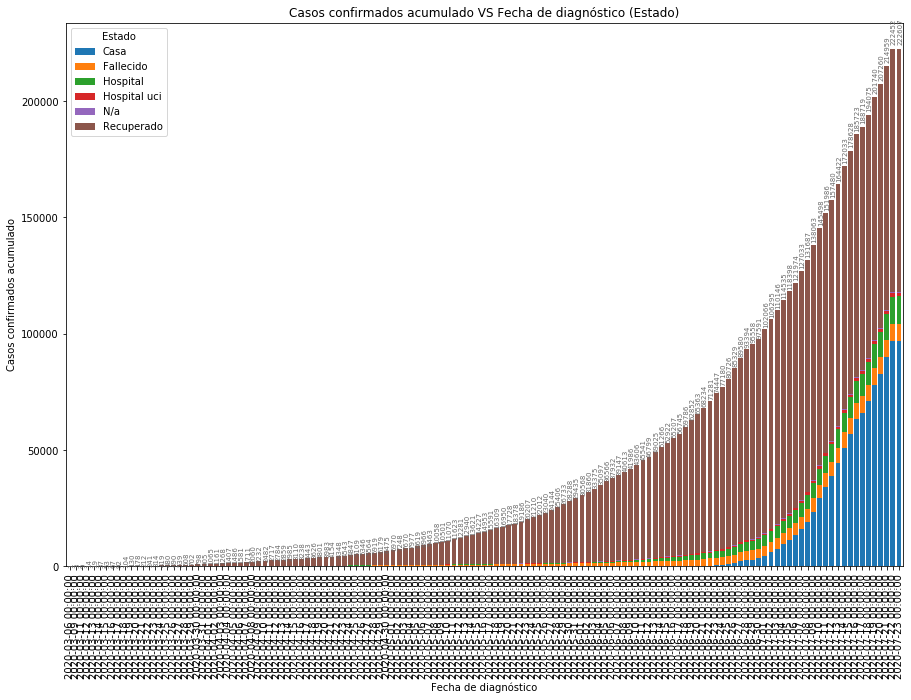

In [43]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>